<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Ri-on/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install asyncpraw yfinance==0.2.54

In [32]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [33]:
#Select the frim for the prediction
firm = "NFLX"

Top 10 Tech Companies in U.S.
- Apple Inc. – $3.69 trillion (AAPL)

- Nvidia Corporation – $3.43 trillion (NVDA)

- Microsoft Corporation – $3.09 trillion (MSFT)

- Amazon.com Inc. – $2.36 trillion (AMZN)

- Alphabet Inc. – $2.26 trillion (GOOGL)

- Meta Platforms Inc. – $1.76 trillion (META)

- Tesla Inc. – $1.14 trillion (TSLA)

- Broadcom Inc. – $1.06 trillion (AVGO)

- Oracle Corporation – $518.32 billion (ORCL)

- Advanced Micro Devices (AMD) – $450 billion (AMD)

In [34]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Netflix, Inc.


# Data Collection

### Stock Price

In [35]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-21 00:00:00-05:00,385.329987,387.320007,377.899994,380.070007,3930100,0.0,0.0
2020-02-24 00:00:00-05:00,364.760010,372.820007,361.000000,368.700012,6936400,0.0,0.0
2020-02-25 00:00:00-05:00,372.000000,375.649994,357.720001,360.089996,6481200,0.0,0.0
2020-02-26 00:00:00-05:00,366.309998,382.000000,365.000000,379.239990,8934100,0.0,0.0
2020-02-27 00:00:00-05:00,371.459991,391.559998,370.600006,371.709991,10967700,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-13 00:00:00-05:00,1026.630005,1045.989990,1025.099976,1043.689941,3476100,0.0,0.0
2025-02-14 00:00:00-05:00,1044.949951,1064.500000,1041.689941,1058.599976,3145400,0.0,0.0
2025-02-18 00:00:00-05:00,1060.000000,1062.000000,1023.750000,1035.849976,4229300,0.0,0.0


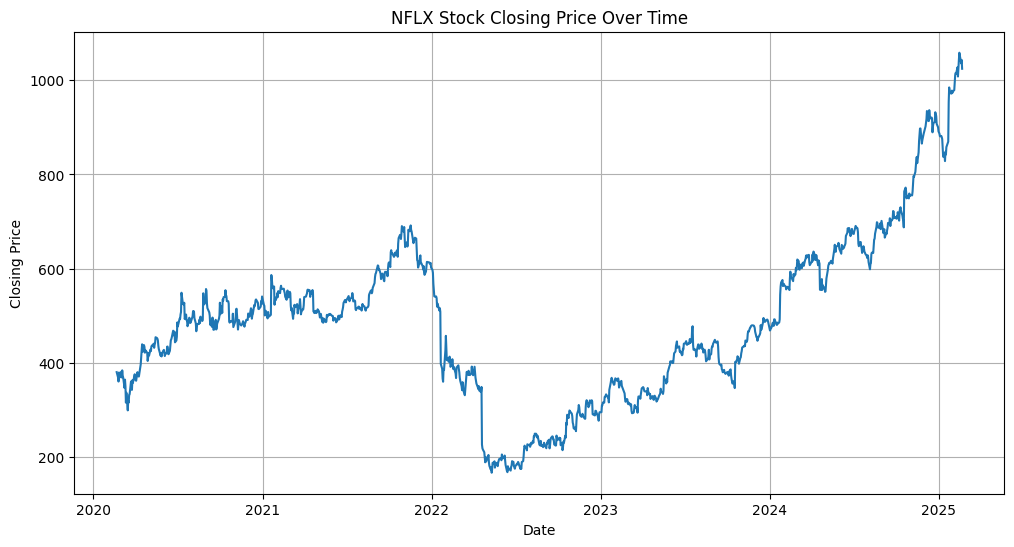

In [36]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [37]:
!pip install fredapi

In [38]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [39]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Net Foreign Currency Exchange Gain Loss,Net Income From Continuing Operations
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,0.0,0.12,19044502000.0,5116228000.0,12438779000.0,17332683000.0,19044502000.0,6605723000.0,-354406000.0,765620000.0,...,199548000.0,199548000.0,12438779000.0,12438779000.0,12230367000.0,12230367000.0,208412000.0,-430661000.0,-430661000.0,5116228000.0
2022-12-31,0.0,0.15,20332955000.0,4491924000.0,14362814000.0,19168285000.0,20332955000.0,5970141000.0,-368902000.0,706212000.0,...,-166550000.0,-166550000.0,14362814000.0,14362814000.0,14026132000.0,14026132000.0,336682000.0,-353111000.0,-353111000.0,4491924000.0
2023-12-31,0.0,0.13,21508387000.0,5407990000.0,14554384000.0,19715368000.0,21508387000.0,6954003000.0,-748598000.0,748598000.0,...,-459359000.0,-459359000.0,14554384000.0,14554384000.0,14197437000.0,14197437000.0,356947000.0,176296000.0,176296000.0,5407990000.0
2024-12-31,0.0,0.13,26314821000.0,8711631000.0,15630431000.0,21038464000.0,26314821000.0,10684390000.0,-451957000.0,718733000.0,...,-590698000.0,-590698000.0,15630431000.0,15630431000.0,15301517000.0,15301517000.0,328914000.0,-121539000.0,-121539000.0,8711631000.0


In [40]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administration',
 'Selling And Marketing Expense',
 'General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

In [41]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [42]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,6 hours ago,Amazon gains creative control of 'James Bond' ...,Amazon's MGM Studios has gained creative contr...
1,1 hour ago,Is Netflix Stock A Buy As Video Streamer Consi...,Netflix stock is taking a victory lap after wi...
2,2 hours ago,Ryan Cohen Boosts Alibaba Stake to $1 Billion,Ryan Cohen still has his sights set on Alibaba...
3,5 hours ago,Q4 2024 Imax Corp Earnings Call,Q4 2024 Imax Corp Earnings Call
4,6 hours ago,Netflix (NFLX) Up 9.4% Since Last Earnings Rep...,Netflix (NFLX) reported earnings 30 days ago. ...
5,8 hours ago,Meta Platforms’ Record Winning Streak Puts Sto...,(Bloomberg) -- Meta Platforms Inc.’s recent re...
6,8 hours ago,Netflix to invest $1 billion in Mexico over ne...,The chief executive of streaming giant Netflix...
7,8 hours ago,"Here is What to Know Beyond Why Netflix, Inc. ...",Netflix (NFLX) has received quite a bit of att...
8,15 hours ago,Imax Corp (IMAX) Q4 2024 Earnings Call Highlig...,Strong financial performance and innovative co...
9,yesterday,"F1 teams, drivers reveal cars at first launch ...",Topflight racing series Formula One kicked off...


##### Financial Times

In [101]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np  # NaN 값을 채우기 위해 사용

# 결과를 저장할 리스트
articles_data = []

for i in range(1, 30):
    url = f"https://www.ft.com/search?q={firm_name}&page={i}&sort=date&isFirstView=false"
    headers = {"User-Agent": "Mozilla/5.0"}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # 기사 항목들을 모두 가져오기
    articles = soup.find_all(class_="o-teaser__content")

    # Data collection
    for article in articles:
        # Title
        title = article.find(class_="js-teaser-heading-link")
        title_text = title.text.strip() if title else np.nan

        # Time
        time = article.find(class_="o-teaser__timestamp")
        time_text = time.text.strip() if time else np.nan

        # Summary
        summary = article.find(class_="o-teaser__standfirst")
        summary_text = summary.text.strip() if summary else np.nan

        # Appending
        articles_data.append({
            "Title": title_text,
            "Time": time_text,
            "Summary": summary_text
        })

# Dataframe
df = pd.DataFrame(articles_data)

df = df.dropna()
df

,Title,Time,Summary
0,Javier Milei wins senate votes despite memecoi...,"February 21, 2025",Libertarian secures electoral reform after his...
1,Electric-vehicle maker Rivian posts first gros...,"February 21, 2025",Group expects to produce fewer trucks and vans...
2,US tech will pay a price for Trump’s approval,"February 20, 2025",The risks of a backlash are rising and could g...
3,Politico’s owner praises JD Vance for his ‘ins...,"February 20, 2025",Mathias Döpfner says many Europeans had ‘inten...
4,Your Life Is Manufactured — the genius and per...,"February 20, 2025",Academic Tim Minshall’s enthusiastic study of ...
...,...,...,...
695,Ford shares sink after steep price cuts for el...,"July 17, 2023",Discounts on F-150 Lightning models facilitate...
696,Ford shares sink as price cut for electric tru...,NaN,Shares in Ford and other electric vehicle make...
697,Twitter: uncreative destruction poses balance ...,"July 17, 2023",Raising cash by selling new shares or securing...
698,Elon Musk claims more trust can be put in his ...,"July 15, 2023",Tesla boss gives rambling 90-minute talk about...


##### Reddit web scrapping

In [ ]:
import asyncpraw #Library for Reddit API
import asyncio # for async environment
import nest_asyncio # Preventing async loop error
import re

nest_asyncio.apply() # Preventing async loop error

#API certification
async def fetch_reddit():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    subreddit = await reddit.subreddit(f"{re.sub(r'[^A-Za-z0-9 ]+', '', firm_name.split(' ')[0]) }")  # await for async environment

    # list
    data = []

    async for post in subreddit.hot(limit=10):  # Top 10 posts
        data.append({
            "Title": post.title,
            "Score": post.score,
            "URL": post.url,
            "Content": post.selftext[:500] #Limit 500 words. revise possible
        })

    await reddit.close()  # await for api calling

    # DataFrame
    df = pd.DataFrame(data)
    return df

# Execution
loop = asyncio.get_event_loop() # Preventing async loop error
loop.run_until_complete(fetch_reddit())

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation